# ENSEMBLE_TECHNIQUES_PROJECT:

# PART A: 

#### DOMAIN: 
Telecom

#### CONTEXT:

A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all 
relevant customer data and develop focused customer retention programs.

#### DATA DESCRIPTION: 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

• Demographic info about customers – gender, age range, and if they have partners and dependents.

#### PROJECT OBJECTIVE: 

To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

#### Brief:

customerID- Customer ID

gender- Whether the customer is a male or a female

SeniorCitizen- Whether the customer is a senior citizen or not (1, 0)

Partner- Whether the customer has a partner or not (Yes, No)

Dependents- Whether the customer has dependents or not (Yes, No)

tenure- Number of months the customer has stayed with the company

PhoneService- Whether the customer has a phone service or not (Yes, No)

MultipleLines- Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService- Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity- Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup- Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport- Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies- Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract- The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling- Whether the customer has paperless billing or not (Yes, No)

PaymentMethod- The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges- The amount charged to the customer monthly

TotalCharges- The total amount charged to the customer

Churn- Whether the customer churned or not (Yes or No)

## QUESTIONS:

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
# For the spliting the data
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb

### 1. Data Understanding & Exploration: [5 Marks]

### 1.A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. 

In [161]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


### 1.B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. 

In [162]:
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [163]:
df = pd.merge(df1, df2, on='customerID')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [164]:
print('The rows and columns of TelcomCustomer-Churn_1 dataset',df1.shape)
print('\n')
print('The rows and columns of TelcomCustomer-Churn_2 dataset',df2.shape)
print('\n')
print('The rows and columns of merged dataset',df.shape)

The rows and columns of TelcomCustomer-Churn_1 dataset (7043, 10)


The rows and columns of TelcomCustomer-Churn_2 dataset (7043, 12)


The rows and columns of merged dataset (7043, 21)


As we can see the total rows of merged dataset(df) is equal to rows of first(df1) and second dataset(df2).

Also,the columns of first and second dataset are: 10,12.

Sum of the columns of first and second dataset are: 22.

Since the dataset is merged based on column: 'customerID' , the total columns of the final dataset is 21.

Hence it is verified that all the columns are incorporated in the merged DataFrame.

#### The df1 and df2 datasets are again combined and stored at df3, These column names are compared with df(final dataset).
##### The columns names and number of columns are equal. Hence it is verified that all the columns are incorporated in the merged DataFrame.

In [165]:
df3 = pd.merge(df1, df2, on="customerID")
print(df3.columns.values == df.columns.values)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


### 2. Data Cleaning & Analysis: 

### 2.A Impute missing/unexpected values in the DataFrame

As we check for the dtypes of each columns: There are 18 objects columnn types, 2 int64 types and 1 float64 type.

In [166]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [167]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

Converting the column 'TotalCharges' to numeric and then checked for missing values.

In [168]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values and all these values are dropped and again missing values are checked.

In [169]:
df.dropna(inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


As we dropped nan values , count is reduced from 7043 to 7032 (7043-11).

### 2.B. Make sure all the variables with continuous values are of ‘Float’ type. 
### [For Example: MonthlyCharges, TotalCharges]

Lets check for the dtypes again

In [171]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [172]:
df.dtypes.value_counts()

object     17
int64       2
float64     2
dtype: int64

As we check for the dtypes of each columns: There are 17 objects columnn types, 2 int64 types and 2 float64 type.

#### MonthlyCharges:   dtype :float64;  TotalCharges:    dtype: float64

### 2.C  Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie chart.

In [173]:
df.drop('customerID', axis=1 ,inplace = True)

The 'customerID' is dropped.

Also the columns that are of 'object' dtype only are selected.

In [174]:
cat_cols = df.select_dtypes(include='object')

In [175]:
print(f'Categorical Columns: {cat_cols.columns.tolist()}\n')

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



##### These are the various categorical columns present in df dataset.

In [176]:
def pie_charts_for_CategoricalVar(df_new,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df_new:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df[i].dtype.name) == 'object':
            b.append(i)
        
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.8)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

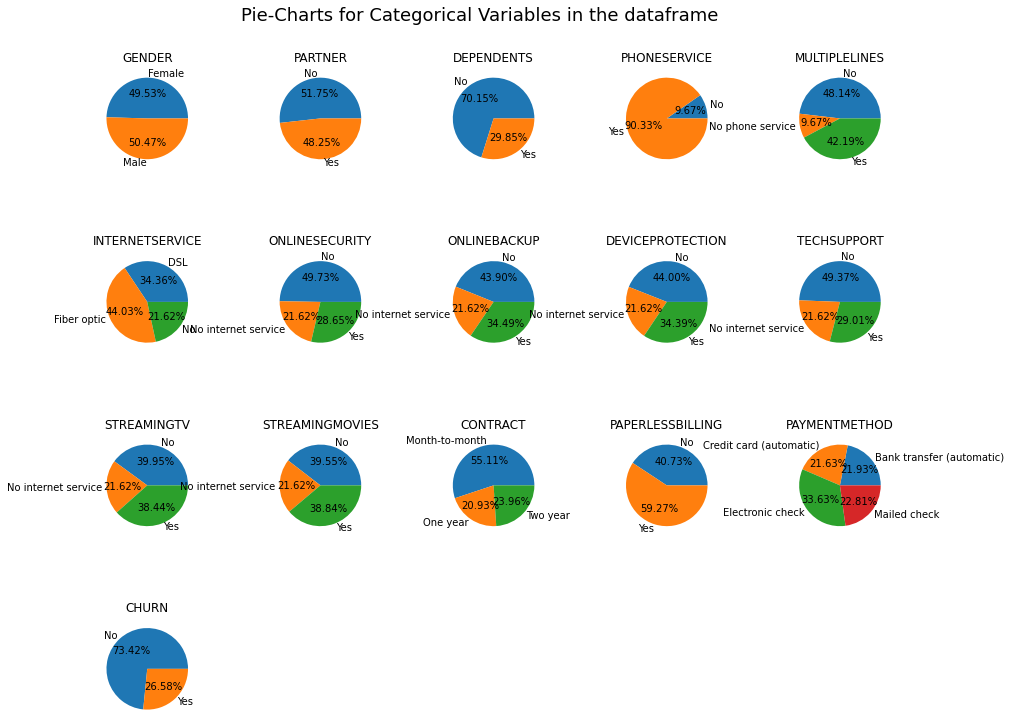

In [177]:
pie_charts_for_CategoricalVar(df,5) 

Here the final dataset is given as input and piecharts are plotted for all the categorical columns mentioned in the cat_cols.

Also the percentage distribution is shown for each piechart.

### 2.D. Share insights for Q2.C.

Categorical Columns: 

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

##### Gender:

There are 49.53% female customers and 50.47% male customers.

##### Partner:

There are fairly equal number of customers who have a partner.

##### Dependents:

Only 29.85% of the customers have a dependent.

##### PhoneService:

90.33% customers has phone service .

##### MultipleLines:

Only 42.19% has multipleline phone service but 48.18% + 9.67% = 57.85% has no multipleline phone service.

##### InternetService:

34.36% of customers have DSL type of InternetService, 44.03% has fiber optic type of InternetService and remaining 21.62% has no InternetService.

##### OnlineSecurity:

49.73% of customers have no OnlineSecurity and 28.65% have OnlineSecurity and 21.62% has no InternetService.

##### OnlineBackup:

43.90% of customers have no OnlineBackup ,34.49% of customers have OnlineBackup and 21.62% have no InternetService.

##### DeviceProtection:

44.00% of customers have no DeviceProtection, 34.39% of customers have DeviceProtection and 21.62% have no InternetService.

##### TechSupport:

49.37% of customers have no TechSupport, 29.01% of customers have TechSupport and 21.62% have no InternetService.

##### StreamingTV:

38.45% of customers have no StreamingTV, 39.95% of customers have StreamingTV and 21.62% have no InternetService.

##### StreamingMovies:

38.45% of customers have no StreamingMovies, 39.95% of customers have StreamingMovies and 21.62% have no InternetService.

##### Contract:

55.11% of customers have Month-to-Month Contract, 20.93% of customers have Oneyear Contract and 23.96% have Twoyear Contract.

##### PaperlessBilling:

59.27% of customers have PaperlessBilling, 40.73% of customers dont have PaperlessBilling.

##### PaymentMethod:

21.63% of customers pays bills through creditcard, 33.63% of customers pays bills through Electronic Check , 21.93% of customers pays bills through Bank Transfer and 22.81% of customers pays bills through MailedCheck.

##### Churn:

73.42% of the customers have not churned ,26.58 of the customers have churned.

##### These are the insights drawn from the piecharts about the catgorical features of the final dataset.

### E. Encode all the appropriate Categorical features with the best suitable approach. 

In [178]:
dummy_columns = ["MultipleLines","InternetService","OnlineSecurity",
                 "OnlineBackup","DeviceProtection","TechSupport",
                 "StreamingTV","StreamingMovies","Contract",
                 "PaymentMethod"]

model_df = pd.get_dummies(df, columns = dummy_columns)

# Encode catigorical variables with 2 levels
enc = LabelEncoder()
encode_columns = ["Churn","PaperlessBilling","PhoneService",
                  "gender","Partner","Dependents"]

for col in encode_columns:
    model_df[col] = enc.fit_transform(df[col])

In [179]:
print('The shape of the dataset after encoding all the categorical features: ',model_df.shape)

The shape of the dataset after encoding all the categorical features:  (7032, 41)


In [180]:
model_df.dtypes

gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

### F. Split the data into 80% train and 20% test 

Dropping the 'tenure' feature and splitting data into X and y.

In [181]:
model_df.drop(columns = ['tenure'], inplace=True)
# Independent Variable
X = model_df.drop(columns=['Churn'])
y = model_df['Churn'] #Target Variable

#### Training Dataset = 80%
#### Testing Dataset = 20%

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Test_size is given as 0.2 where training daatset is 80% and testing dataset is 20%.
# If stratify is given as y then the data is split using the class labels.

In [183]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [184]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

### G. Normalize/Standardize the data with the best suitable approach.

StandardScaler() is used to normalize all the values stored in all columns.

In [185]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [186]:
X_train

array([[ 0.99627361, -0.43931886,  1.02831173, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       [ 0.99627361, -0.43931886, -0.97246775, ..., -0.52489066,
         1.39630196, -0.5394682 ],
       [-1.00374033, -0.43931886,  1.02831173, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       ...,
       [-1.00374033, -0.43931886,  1.02831173, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       [-1.00374033, -0.43931886,  1.02831173, ..., -0.52489066,
        -0.71617747,  1.85367739],
       [ 0.99627361,  2.27625101, -0.97246775, ..., -0.52489066,
         1.39630196, -0.5394682 ]])

Using SMOTE , Target variable is balanced .

Now there are 4130 datas for each class 0 and class 1.

In [187]:
smt = SMOTE(random_state = 42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [188]:
y_train.value_counts() 

# Churn : No is 0 and Yes is 1.

0    4130
1    4130
Name: Churn, dtype: int64

### 3. Model building and Improvement: 

### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

### XGbClassifier Baseline Model with default parameters

The performance metrics are :

1. Accuracy
2. Confusion Matrix
3. Classification report - precision,recall,f1_score

In [189]:
model = XGBClassifier()
model.fit(X_train, y_train)


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Find Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.40%


In [190]:
model 
# Baseline Model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Accuracy of the baseline model is found to be : 78.18%

In [191]:
print(confusion_matrix(y_test, predictions))

[[858 175]
 [143 231]]


#### Confusion matrix of a baseline model is found

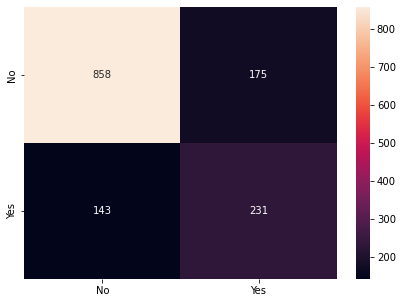

In [192]:
cm = confusion_matrix(y_test, predictions, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [193]:
print('Classification Matrix:\n',classification_report(y_test, predictions))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.78      1407



#### Classification matrix of a baseline model is found.

## For A. You have to build a basic XGBoost Classifier Models with a range of random parameter values. 

## Here, you can use the random search CV and print the best parameters.

In [194]:
tuned_parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 8]
        }

model = XGBClassifier(learning_rate=0.3, 
                    n_estimators=300,
                    booster = 'gbtree',
                    objective='binary:logistic',
                    silent=True, 
                    nthread=-1)


skf = StratifiedKFold(n_splits=5, shuffle = False)

random_search_model = RandomizedSearchCV(estimator = model, 
                                   param_distributions=tuned_parameters, 
                                   n_iter=10, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   cv=skf.split(X_train,y_train), 
                                   verbose=3, 
                                   random_state=22)

random_search_model.fit(X_train, y_train)

y_pred = random_search_model.predict(X_test)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[19:58:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 77.97%


In [195]:
print(confusion_matrix(y_test, y_pred))

[[865 168]
 [142 232]]


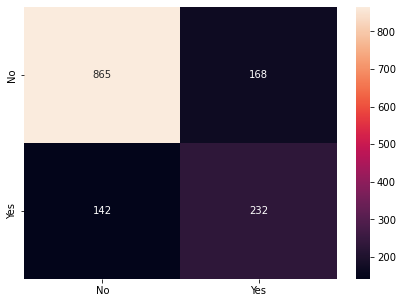

In [196]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [197]:
print('Classification Matrix:\n',classification_report(y_test, y_pred))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.58      0.62      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.78      0.78      0.78      1407



Baseline Model with XGBClassifier is built and also hyper parameters are tuned and Hypertuned model is built using RandomSearchCV

### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

## For B. You can build a new model and tune the hyper parameters further based on the best parameters from the previous step and display the best ones. 

## Here, you can use GridSearch search.

The parameters are tuned as per the need.

In [198]:
param_grid = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0,1,0.01,0.05],
    'gamma' : [0,0.25,1.0],
    'reg_lambda' : [0,1.0,10.0],
    'scale_pos_weight' : [1,3,5]
}

In [199]:
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.3, 
                    n_estimators=300, seed=24, subsample=0.9, colsample_bytree=0.5)

In [200]:
clf_xgb_tuned = GridSearchCV(estimator=xgb_estimator,
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=2,
                             n_jobs=-1,
                             cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=24)
)

In [201]:
clf_xgb_tuned.fit(X_train,
                  y_train,
                  verbose=True,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
           eval_set=[(X_test, y_test)]
)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[0]	validation_0-aucpr:0.49264
[1]	validation_0-aucpr:0.52789
[2]	validation_0-aucpr:0.56644
[3]	validation_0-aucpr:0.61323
[4]	validation_0-aucpr:0.61998
[5]	validation_0-aucpr:0.62127
[6]	validation_0-aucpr:0.63152
[7]	validation_0-aucpr:0.63282
[8]	validation_0-aucpr:0.62453
[9]	validation_0-aucpr:0.62095
[10]	validation_0-aucpr:0.61591
[11]	validation_0-aucpr:0.61647
[12]	validation_0-aucpr:0.61404
[13]	validation_0-aucpr:0.61643
[14]	validation_0-aucpr:0.61459
[15]	validation_0-aucpr:0.61562
[16]	validation_0-aucpr:0.61545


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0, 1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [202]:
clf_xgb_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=24, ...)

In [203]:
clf_xgb_tuned.best_params_

{'gamma': 0,
 'learning_rate': 1,
 'max_depth': 3,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [204]:
clf_xgb_tuned.best_score_

0.9232423601610676

### The performance metrics are :

Accuracy

Confusion Matrix

Classification report - precision,recall,f1_score

In [205]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, make_scorer

In [206]:
y_pred2 = clf_xgb_tuned.predict(X_test)

In [207]:
print(confusion_matrix(y_test, y_pred2))

[[814 219]
 [118 256]]


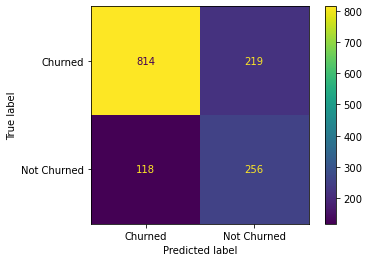

In [208]:
plot_confusion_matrix(clf_xgb_tuned,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Churned','Not Churned'])

In [209]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       932
           1       0.68      0.54      0.60       475

    accuracy                           0.76      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.75      0.76      0.75      1407



In [210]:
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.7604832977967306

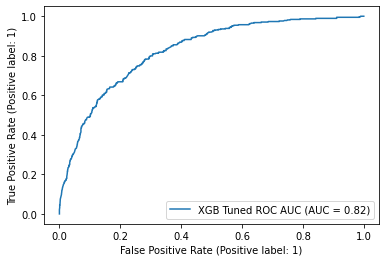

In [211]:
plot_roc_curve(clf_xgb_tuned,
               X_test,
               y_test,
               name='XGB Tuned ROC AUC');

Thus XGBClassifier Model is built using GridSearchCV.

# PART B

#### DOMAIN: 
IT

#### CONTEXT: 

The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts 
involved in building workflows for each dataset.

#### PROJECT OBJECTIVE: 

Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

#### STEPS AND TASK:

1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).

2. Create separate functions for various purposes.

3. Various base models should be trained to select the best performing model.

4. Pickle file should be saved for the best performing model.

#### Include best coding practices in the code:

• Modularization

• Maintainability

• Well commented code etc.

## Traditional Approach is carried out:

In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
# For the spliting the data
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb

In [213]:
df4 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df4.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [214]:
df5 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df5.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Here we merge the two datasets and stored in anew variable df_new.

In [215]:
df_new= pd.merge(df4, df5, on='customerID')
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### The Null values are dropped.

In [216]:
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'], errors='coerce')
df_new.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [217]:
df_new.dropna(inplace = True)
df_new.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

CustomerID is dropped.
#### Categorical columns are encoded.

In [218]:
df_new.drop('customerID', axis=1 ,inplace = True)

In [219]:
cat_cols = df_new.select_dtypes(include='object')
print(f'Categorical Columns: {cat_cols.columns.tolist()}\n')

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



In [220]:
dummy_columns = ["MultipleLines","InternetService","OnlineSecurity",
                 "OnlineBackup","DeviceProtection","TechSupport",
                 "StreamingTV","StreamingMovies","Contract",
                 "PaymentMethod"]

model_df1 = pd.get_dummies(df_new, columns = dummy_columns)

# Encode catigorical variables with 2 levels
enc = LabelEncoder()
encode_columns = ["Churn","PaperlessBilling","PhoneService",
                  "gender","Partner","Dependents"]

for col in encode_columns:
    model_df1[col] = enc.fit_transform(df_new[col])

In [221]:
print('The shape of the dataset after encoding all the categorical features: ',model_df1.shape)

The shape of the dataset after encoding all the categorical features:  (7032, 41)


## Various Base Models:

In [222]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

#### Setting the target and Independent Variable :

In [223]:
model_df1.drop(columns = ['tenure'], inplace=True)
# Independent Variable
X = model_df1.drop(columns=['Churn'])
y = model_df1['Churn'] #Target Variable

#### Splitting the training and testing :

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

0    4130
1    1495
Name: Churn, dtype: int64
0    1033
1     374
Name: Churn, dtype: int64


#### Normalizing the Datasets

In [225]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [226]:
smt = SMOTE(random_state = 42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [227]:
y_train.value_counts() 

0    4130
1    4130
Name: Churn, dtype: int64

### 1.KNN :

In [228]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [229]:
KNN.fit(X_train,y_train)
# Fitting the KNN model on training data : X,y
pred_labels = KNN.predict(X_test)
#Using the X_test values as input ,labels are predicted and stored in pred_labels

Accuracy on Training Data 0.8581113801452784


Accuracy on Testing Data 0.6879886282871357


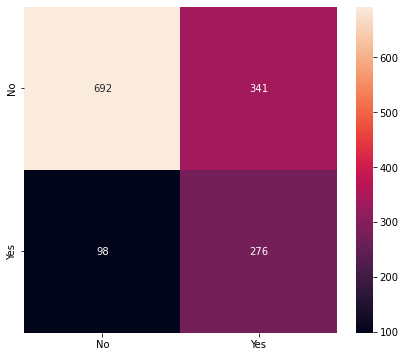

In [230]:
print('Accuracy on Training Data',KNN.score(X_train,y_train))
print('\n')
print('Accuracy on Testing Data',KNN.score(X_test,y_test))
cm = confusion_matrix(y_test,pred_labels)
df_cm = pd.DataFrame(cm,index = [i for i in ['No','Yes']],columns = [i for i in ['No','Yes']])
plt.figure(figsize=(7,6))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [231]:
print('Accuracy on Testing Data of KNN Model: ',KNN.score(X_test,y_test))

Accuracy on Testing Data of KNN Model:  0.6879886282871357


### 2.SVM :

In [232]:
from sklearn.svm import SVC

svc_model = SVC(C=0.1, kernel='rbf', gamma=1) 

svc_model.fit(X_train, y_train)
# Model is fiT on the Trainign Data
prediction = svc_model.predict(X_test)


In [233]:
print('Accuracy on Training Data',svc_model.score(X_train, y_train))
print('Accuracy on Testing Data',svc_model.score(X_test, y_test))

Accuracy on Training Data 0.7329297820823245
Accuracy on Testing Data 0.751954513148543


Confusion Matrix


<AxesSubplot:>

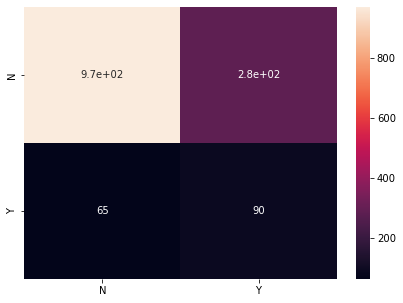

In [234]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(prediction,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["N","Y"]],
                  columns = [i for i in ["N","Y"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [235]:
print('Accuracy on Testing Data of SVM Model: ',svc_model.score(X_test, y_test))

Accuracy on Testing Data of SVM Model:  0.751954513148543


In [236]:
print('Classification matrix:\n',classification_report(prediction,y_test))

Classification matrix:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85      1252
           1       0.24      0.58      0.34       155

    accuracy                           0.75      1407
   macro avg       0.59      0.68      0.59      1407
weighted avg       0.86      0.75      0.79      1407



### 3. XGBClassifier Model :

In [237]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)


# make predictions for test data
y_pred = model3.predict(X_test)
predictions = [round(value) for value in y_pred]

# Find Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.40%


[[858 175]
 [143 231]]


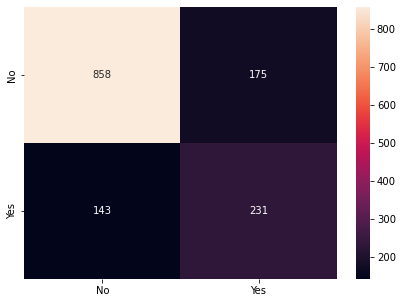

In [238]:
print(confusion_matrix(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [239]:
print('Classification Matrix:\n',classification_report(y_test, predictions))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.78      1407



In [240]:
print("Accuracy of testing data on XGBClassifier Model: %.2f%%" % (accuracy * 100.0))

Accuracy of testing data on XGBClassifier Model: 77.40%


### 4. RandomForestClassifier :

In [241]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Accuracy of testing data on RandomForestClassifier Model:',metrics.accuracy_score(y_test, prediction_test))

Accuracy of testing data on RandomForestClassifier Model: 0.8059701492537313


[[966  86]
 [187 168]]


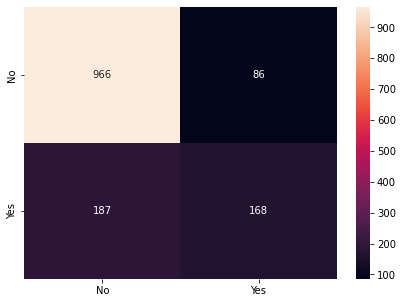

In [242]:
print(confusion_matrix(y_test, prediction_test))
cm = confusion_matrix(y_test, prediction_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [243]:
print ('Accuracy of testing data on RandomForestClassifier Model:',metrics.accuracy_score(y_test, prediction_test))

Accuracy of testing data on RandomForestClassifier Model: 0.8059701492537313


### 5. Adaboost Classifier :

In [244]:
from sklearn.ensemble import AdaBoostClassifier
model_n = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model_n.fit(X_train,y_train)
preds = model_n.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8109452736318408

In [245]:
print('Accuracy of testing data on AdaBoostClassifier Model:',metrics.accuracy_score(y_test, preds))

Accuracy of testing data on AdaBoostClassifier Model: 0.8109452736318408


The various base models are constructed on the dataset and then accuracy for each model on the testing dataset is found.

#### Based on the comparison of the accuracy of various models:

The model with best accuracy is : AdaBoostClassifier.

## The End.